In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("CarPricesData.csv")

In [3]:
print(df.shape," Shape before removing the duplicate values")
df=df.drop_duplicates()
print(df.shape," Shape after the removing the duplicate values ")

(1436, 10)  Shape before removing the duplicate values
(1435, 10)  Shape after the removing the duplicate values 


### Defining the problem statement 
#### Create a model which can predict the price of a car
* Target variable: price of a car
* Predictors: Age,Kms,Fueltype,CC etcd

### Determining the type of machine learning
* By looking the dataset we have to create supervised regression model

### Looking at the distribution of target variable 
* If target variable distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenario

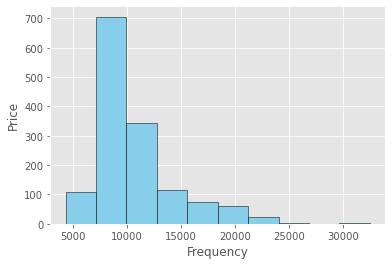

In [4]:
plt.hist(df["Price"],edgecolor="black",color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.show()

* The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

### Basic Data Exploration

In [5]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [6]:
df.shape

(1435, 10)

In [7]:
df.info(),df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


(None,
 Price         236
 Age            77
 KM           1263
 FuelType        3
 HP             12
 MetColor        2
 Automatic       2
 CC             12
 Doors           4
 Weight         59
 dtype: int64)

In [8]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
mean,10720.915679,56.020237,68571.782578,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


### Visual Exploratory Data Analysis
* Numerical variable
* Categorical variable

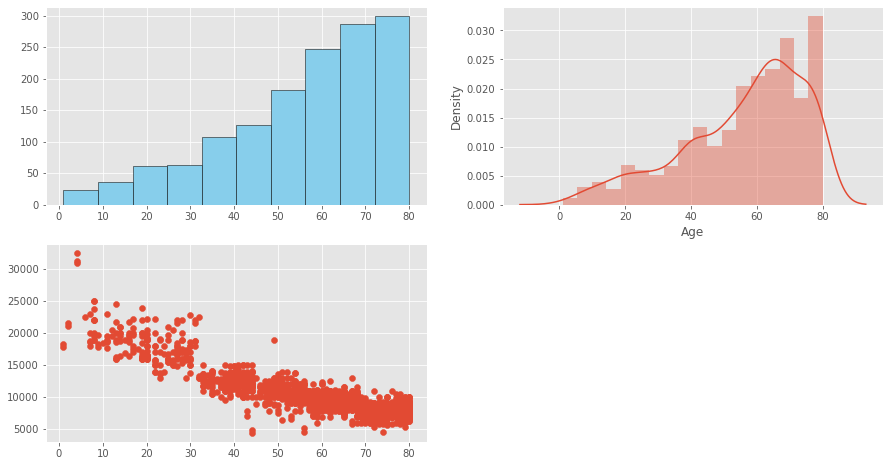

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["Age"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["Age"])
plt.subplot(2,2,3)
plt.scatter(df["Age"],df["Price"])
plt.show()

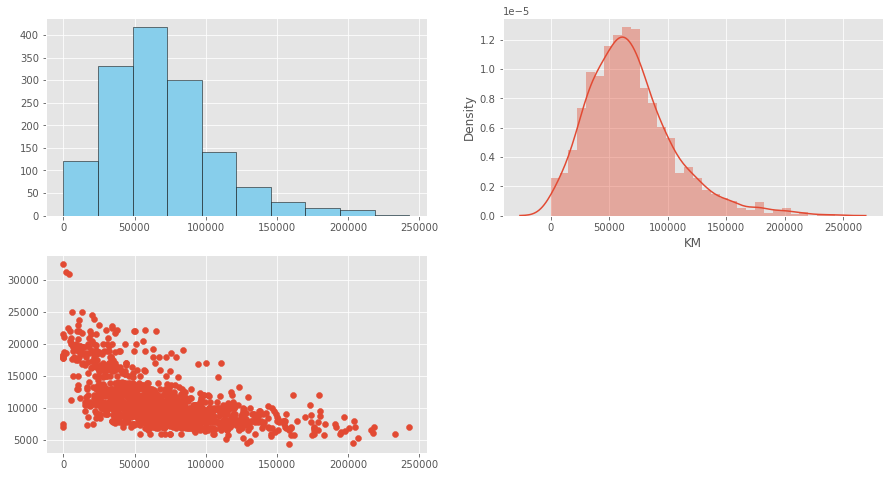

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["KM"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["KM"])
plt.subplot(2,2,3)
plt.scatter(df["KM"],df["Price"])
plt.show()

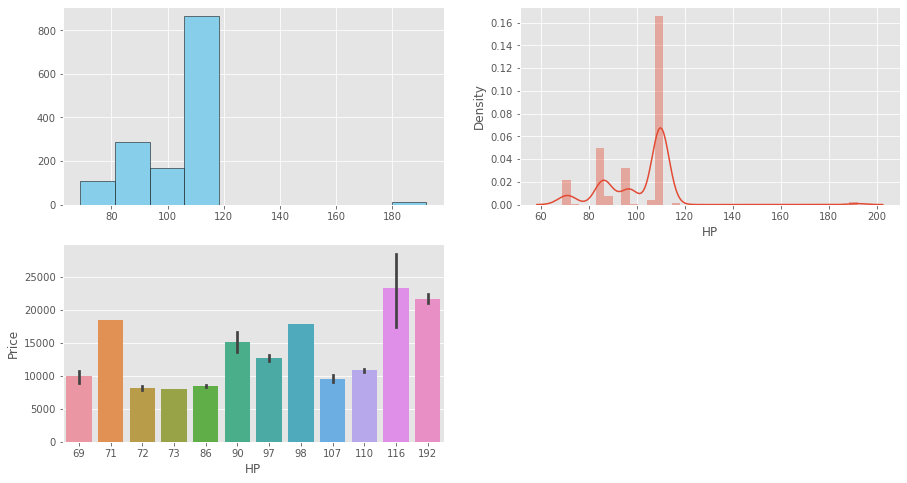

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["HP"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["HP"])
plt.subplot(2,2,3)
sns.barplot(df["HP"],df["Price"])
plt.show()

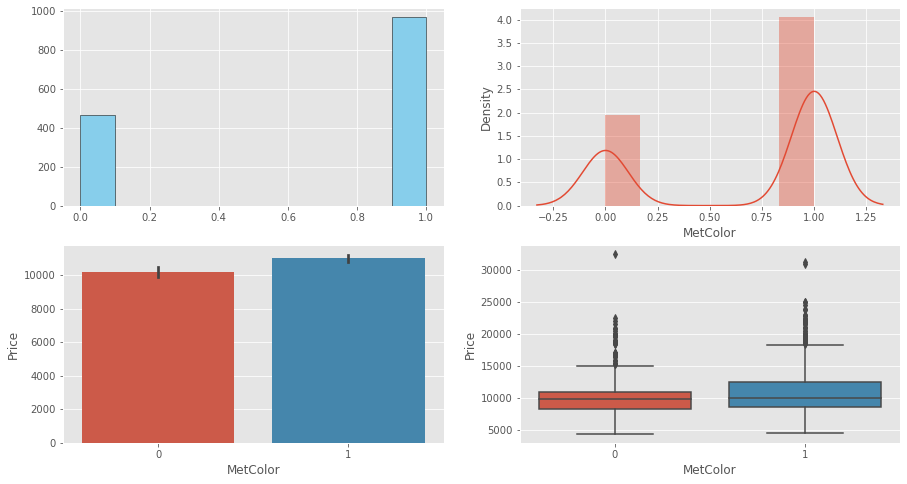

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["MetColor"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["MetColor"])
plt.subplot(2,2,3)
sns.barplot(df["MetColor"],df["Price"])
plt.subplot(2,2,4)
sns.boxplot(df["MetColor"],df["Price"])
plt.show()

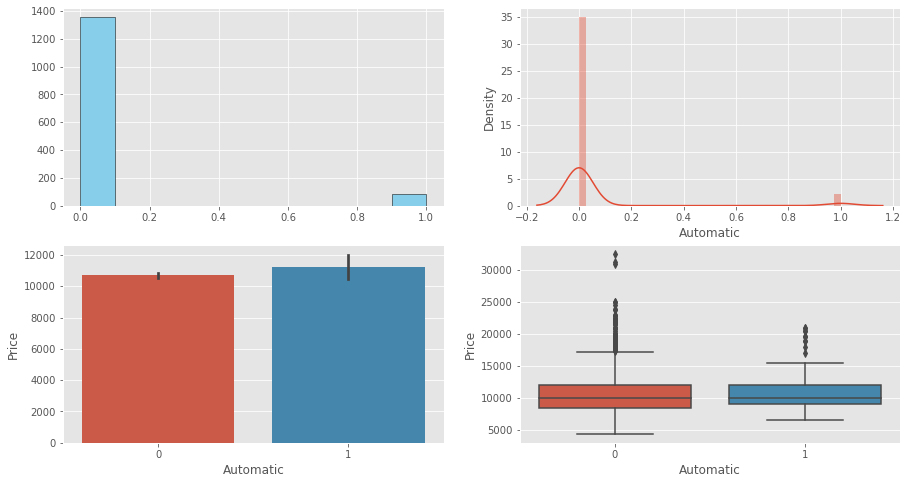

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["Automatic"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["Automatic"])
plt.subplot(2,2,3)
sns.barplot(df["Automatic"],df["Price"])
plt.subplot(2,2,4)
sns.boxplot(df["Automatic"],df["Price"])
plt.show()

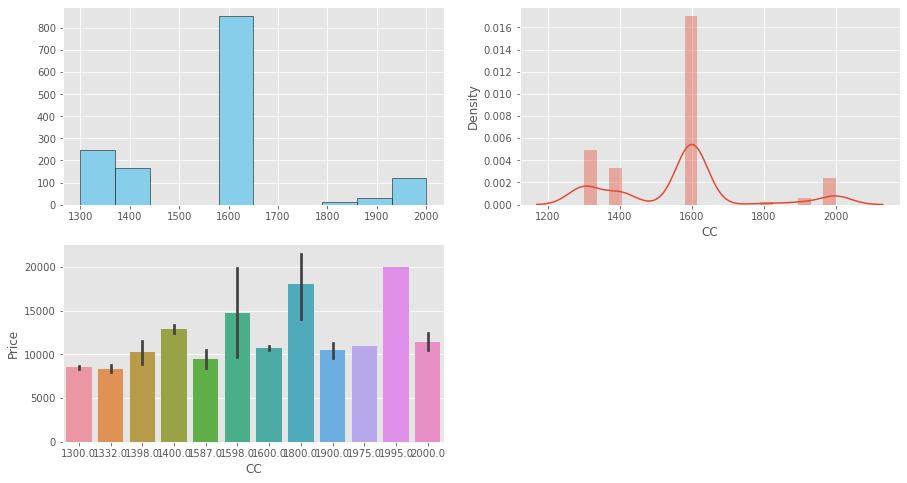

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["CC"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["CC"])
plt.subplot(2,2,3)
sns.barplot(df["CC"],df["Price"])
plt.show()

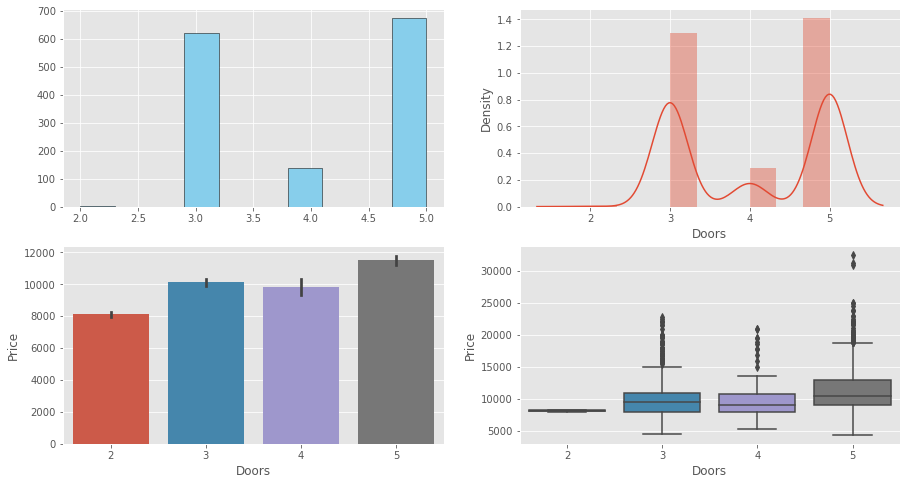

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["Doors"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["Doors"])
plt.subplot(2,2,3)
sns.barplot(df["Doors"],df["Price"])
plt.subplot(2,2,4)
sns.boxplot(df["Doors"],df["Price"])
plt.show()

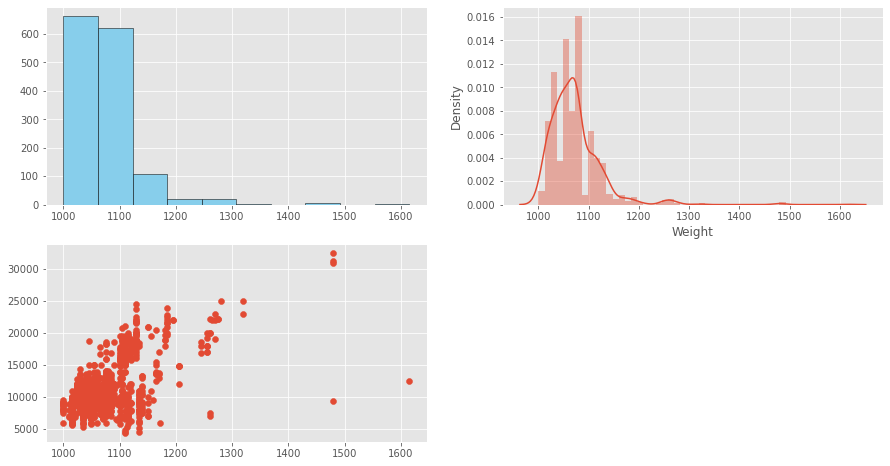

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(df["Weight"],color="skyblue",edgecolor="black")
plt.subplot(2,2,2)
sns.distplot(df["Weight"])
plt.subplot(2,2,3)
plt.scatter(df["Weight"],df["Price"])
plt.show()

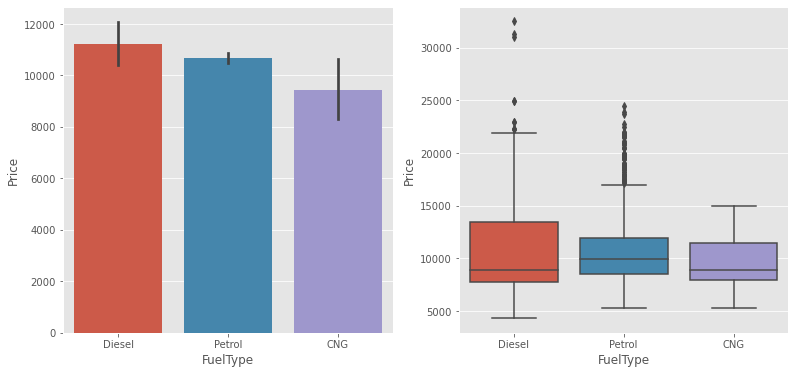

In [17]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(df["FuelType"],df["Price"])
plt.subplot(1,2,2)
sns.boxplot(df["FuelType"],df['Price'])
plt.show()

### Visualizing outlier and Treatment 
- Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

- Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

#### Why we should treat outlier ?
- Outliers bias the training of machine learning models. As the algorithm tries  to fit the extreme value, it goes away from majority of the data.

- There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value


In [18]:
columns=df.columns.drop(["Price","FuelType","MetColor","Automatic","Doors"])

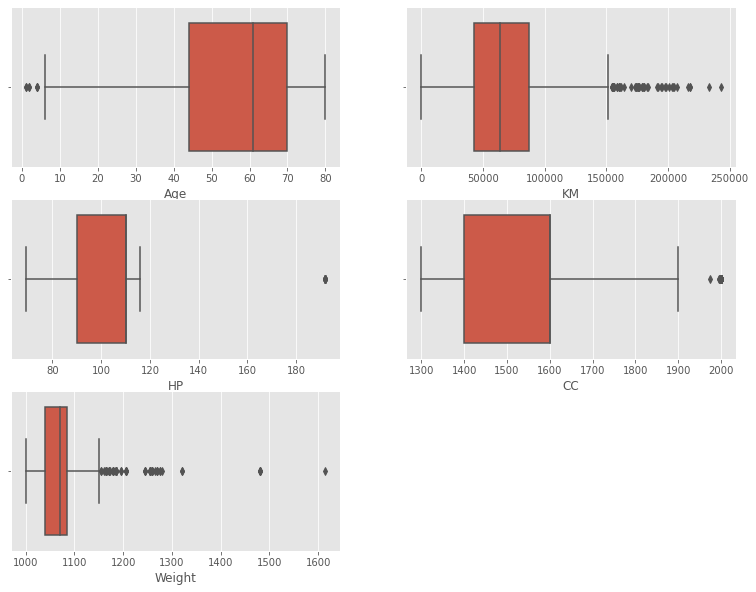

In [19]:
plt.figure(figsize=(13,10))
for i in range(len(columns)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[columns[i]])

* lets check each column one by one 

In [20]:
df["KM"].quantile([0.25,0.5,0.75,0.95,0.99])

0.25     43000.0
0.50     63451.0
0.75     87041.5
0.95    138425.8
0.99    191375.2
Name: KM, dtype: float64

In [21]:
Q3=df["KM"].quantile(0.75)
Q1=df['KM'].quantile(0.25)
IQR=Q3 - Q1
upper_fence=Q3 + 1.5 * IQR
print(upper_fence)
print(df.shape)
print(df[df["KM"]>upper_fence].shape)

153103.75
(1435, 10)
(49, 10)


In [22]:
medi_value=df["KM"].median()
print(medi_value)

63451.0


In [23]:
print(df[df["KM"]<=upper_fence].shape)
print(df.shape)

(1386, 10)
(1435, 10)


In [24]:
df["KM"].value_counts().sort_values(ascending=False)

36000     9
1         8
43000     7
59000     7
75000     6
         ..
92255     1
40836     1
124591    1
96135     1
77821     1
Name: KM, Length: 1263, dtype: int64

* Impute the outliers with the median value in km column

In [25]:
df['KM'][df['KM']>upper_fence]=medi_value

In [26]:
df[df["KM"]>upper_fence].shape

(0, 10)

* Now come to horse power

In [27]:
Q3=df["HP"].quantile(0.75)
Q1=df['HP'].quantile(0.25)
IQR=Q3 - Q1
upper_fence=Q3 + 1.5 * IQR
print(upper_fence)
print(df.shape)
print(df[df["HP"]>upper_fence].shape)

140.0
(1435, 10)
(11, 10)


In [28]:
# removing the rows 
df=df[-(df["HP"]>upper_fence)]
df.shape

(1424, 10)

* Now come to CC

In [29]:
Q3=df["CC"].quantile(0.75)
Q1=df['CC'].quantile(0.25)
IQR=Q3 - Q1
upper_fence=Q3 + 1.5 * IQR
print(upper_fence)
print(df.shape)
print(df[df["CC"]>upper_fence].shape)

1900.0
(1424, 10)
(121, 10)


In [30]:
# we will impute outliers because no. of rows are quite high
df["CC"].value_counts().sort_values(ascending=False)

1600.0    845
1300.0    247
1400.0    164
2000.0    118
1900.0     30
1587.0      4
1598.0      4
1800.0      3
1995.0      2
1332.0      2
1398.0      2
1975.0      1
Name: CC, dtype: int64

In [31]:
# so we can replace that value with mode
mod_value=df["CC"].mode()[0]
df["CC"][df["CC"]>upper_fence]=mod_value
print(df[df["CC"]>upper_fence].shape)

(0, 10)


* Now come to weight of the car

In [32]:
Q3=df["Weight"].quantile(0.75)
Q1=df["Weight"].quantile(0.25)
IQR=Q3 - Q1
upper_fence=Q3 + 1.5 * IQR
print(upper_fence)
print(df.shape)
print(df[df["Weight"]>upper_fence].shape)

1152.5
(1424, 10)
(54, 10)


In [33]:
# we can inpute these outliers 
df["Weight"].value_counts().sort_values(ascending=False).head(10)

1075.0    192
1050.0    167
1015.0    117
1035.0    106
1070.0     89
1025.0     70
1065.0     51
1080.0     47
1055.0     42
1100.0     40
Name: Weight, dtype: int64

In [34]:
df["Weight"].median()

1065.0

In [35]:
# it seems both are almost same so we can take either mode or median it is fine
mod_weight=df["Weight"].mode()[0]
df["Weight"][df["Weight"]>upper_fence]=mod_weight
print(df[df["Weight"]>upper_fence].shape)

(0, 10)


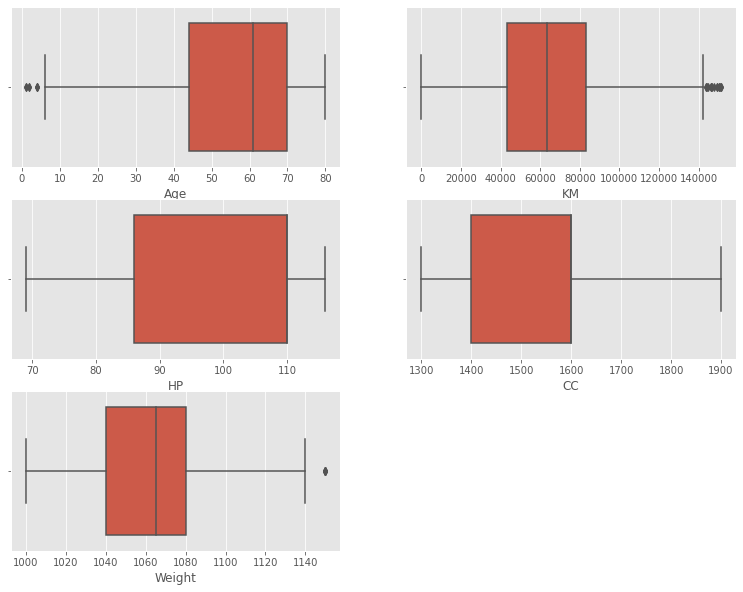

In [36]:
# again visualize the column through boxplot 
plt.figure(figsize=(13,10))
for i in range(len(columns)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[columns[i]])

* Outlier treatment is done

In [37]:
# shape after outlier treatment
df.shape

(1424, 10)

### Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.
There are below options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [38]:
(df.isnull().sum()/len(df))*100

Price        0.000000
Age          0.140449
KM           0.000000
FuelType     0.210674
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.140449
Doors        0.000000
Weight       0.140449
dtype: float64

#### Treating the missing values

* For continuous variable = median
* For categorical variable = mode


In [39]:
medi_age=df["Age"].median()
df['Age'].fillna(medi_age,inplace=True)
medi_weight=df['Weight'].median()
df["Weight"].fillna(medi_weight,inplace=True)

In [40]:
df["FuelType"].value_counts()

Petrol    1250
Diesel     154
CNG         17
Name: FuelType, dtype: int64

In [41]:
mod_fuel=df["FuelType"].mode()[0]
df["FuelType"].fillna(mod_fuel,inplace=True)
mod_cc=df["CC"].mode()[0]
df["CC"].fillna(mod_cc,inplace=True)

In [42]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Feature Selection

#### We will do these two tests for selection of feature
* Correlation matrix- Continous vs Continous
* ANOVA test- Continous vs Categorical

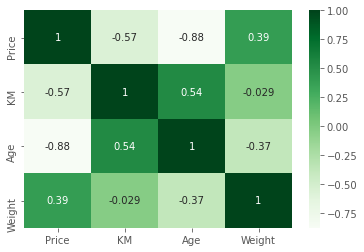

In [43]:
# correlation matrix
continous_cols=["Price","KM","Age","Weight"]
sns.heatmap(df[continous_cols].corr(),annot=True,cmap="Greens")
plt.show()

* Selected columns would be KM,Age,Weight

#### Anova test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The     average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [44]:
categorical_variables=["FuelType","HP","MetColor","Automatic","CC","Doors"]
significance_level=0.05
def anovatest(data,target_variable,categorical_cols):
    select_col=[]
    P_value=[]
    Result=[]
    d={"column name":select_col,"P-value":P_value,"Result":Result}
    for col in categorical_cols:
        categorical_list=data.groupby(col)[target_variable].apply(list)
        anova_result=f_oneway(*categorical_list)
        
        if anova_result[1]<significance_level:
            select_col.append(col)
            P_value.append(anova_result[1])
            Result.append("Select")

        else:
            select_col.append(col)
            P_value.append(anova_result[1])
            Result.append("NotSelect")
            
    print(pd.DataFrame(d))
anovatest(df,"Price",categorical_variables)

  column name       P-value     Result
0    FuelType  3.942048e-02     Select
1          HP  8.833578e-87     Select
2    MetColor  9.461944e-06     Select
3   Automatic  1.205523e-01  NotSelect
4          CC  2.828993e-36     Select
5       Doors  9.781400e-15     Select


* Final predictors

In [45]:
df.drop("Automatic",axis=1,inplace=True)
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'CC', 'Doors',
       'Weight'],
      dtype='object')

### Data Pre-processing for machine learning
List of steps performed on predictor variables before data can be used for machine learning
* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [46]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,1600.0,3,1075.0
1,13750,23.0,72937,Diesel,90,1,1600.0,3,1075.0
2,13950,24.0,41711,Diesel,90,1,1600.0,3,1075.0
3,14950,26.0,48000,Diesel,90,0,1600.0,3,1075.0
4,13750,30.0,38500,Diesel,90,0,1600.0,3,1075.0


In [47]:
df["FuelType"].value_counts()

Petrol    1253
Diesel     154
CNG         17
Name: FuelType, dtype: int64

In [48]:
df_new=pd.get_dummies(df["FuelType"])
df_new=df_new.drop("CNG",axis=1)
df.drop("FuelType",axis=1,inplace=True)
df=pd.concat([df,df_new],axis=1)
df.head()

,Price,Age,KM,HP,MetColor,CC,Doors,Weight,Diesel,Petrol
0,13500,23.0,46986,90,1,1600.0,3,1075.0,1,0
1,13750,23.0,72937,90,1,1600.0,3,1075.0,1,0
2,13950,24.0,41711,90,1,1600.0,3,1075.0,1,0
3,14950,26.0,48000,90,0,1600.0,3,1075.0,1,0
4,13750,30.0,38500,90,0,1600.0,3,1075.0,1,0


### Spliting and Scalling the data

In [49]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)

In [51]:
Scaler=MinMaxScaler()
X_train[X_train.columns]=Scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=Scaler.transform(X_test[X_test.columns])

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1068, 9)
(1068,)
(356, 9)
(356,)


### Model Training and Evaluation

* Using statsmodel 

In [53]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [54]:
model_dic={}

In [55]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     614.9
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:31:50   Log-Likelihood:                -9238.4
No. Observations:                1068   AIC:                         1.850e+04
Df Residuals:                    1058   BIC:                         1.855e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.385e+04    491.685     28.178      0.000    1.29e+04    1.48e+04
Age        -1.063e+04    247.798    -42.914      0.000   -1.11e+04   -1.01e+04
KM         -1836.5005    269.565     -6.813      0.000   -2365.444   -1307.557
HP          5702.9679    371.561     15.349      0.000    4973.887    6432.048
MetColor      36.7661     91.562      0.402      0.688    -142.898     216.430
CC         -5047.5574    406.516    -12.417      0.000   -5845.227   -4249.888
Doors        140.8204    156.666      0.899      0.369    -166.592     448.233
Weight      2618.9778    312.890      8.370      0.000    2005.022    3232.933
Diesel      4973.8576    467.696     10.635      0.000    4056.140    5891.575
Petrol      1453.0743    363.691      3.995      0.000     739.436    2166.713
==============================================================================
Omnibus:                      129.990   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.685
Skew:                           0.405   Prob(JB):                    6.43e-156
Kurtosis:                       6.925   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)
d={"Predicted value":round(y_test_pred),"Actual value":y_test}
pred_df=pd.DataFrame(d)
pred_df.head()

,Predicted value,Actual value
1275,7182.0,7250
978,9510.0,8745
420,11233.0,10500
428,11599.0,10500
687,9325.0,9450


In [57]:
accuracy=r2_score(y_test,y_test_pred) * 100
print("The accuracy score is {}%".format(round(accuracy)))
model_dic["Statsmodel"]=accuracy

The accuracy score is 81%


* Using Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_test_predg=linear_model.predict(X_test)
accuracy_g=r2_score(y_test,y_test_predg)*100
print("The accuracy score is {}%".format(round(accuracy_g)))

The accuracy score is 81%


* Using Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
random_model=RandomForestRegressor(n_estimators=12)
random_model.fit(X_train,y_train)
y_test_r=random_model.predict(X_test)
accuracy_r=r2_score(y_test,y_test_r)*100
print("The accuracy score is {}%".format(round(accuracy_r)))
model_dic["Random Forest"]=accuracy_r

The accuracy score is 87%


* Using KNN

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
model_kn=KNeighborsRegressor(n_neighbors=10)
model_kn=model_kn.fit(X_train,y_train)
y_test_kn=random_model.predict(X_test)
accuracy_kn=r2_score(y_test,y_test_kn)*100
print("The accuracy score is {}%".format(round(accuracy_kn)))
model_dic["KNN"]=accuracy_kn

The accuracy score is 87%


* Using Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
decision_model=DecisionTreeRegressor(random_state=0)
decision_model.fit(X_train,y_train)
y_test_d=decision_model.predict(X_test)
accuracy_d=r2_score(y_test,y_test_d)*100
print("The accuracy score is {}%".format(round(accuracy_d)))
model_dic["Decision Tree"]=accuracy_d

The accuracy score is 81%


In [66]:
models_acc=pd.Series(model_dic)
models_acc=models_acc.reset_index()
models_acc.columns=["Model Name","Accuracy"]
models_acc

,Model Name,Accuracy
0,Statsmodel,80.822842
1,Random Forest,87.138253
2,KNN,87.138253
3,Decision Tree,80.616435


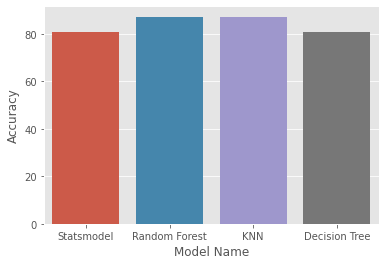

In [67]:
sns.barplot(models_acc["Model Name"],models_acc["Accuracy"]);